In [1]:
import pandas as pd
import numpy as np
import itertools
from datetime import datetime
from datetime import timedelta
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
# burda confusion matrisi için fonksiyon oluşturdum fonksiyon ilk önce matrisi normalize edip sonra çiziyor

In [2]:
train=pd.read_csv('train.csv')



In [3]:
train

,ID,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,611,2013-08-24,Sampdoria,Juventus,A,8.00,4.00,1.45,7.25,4.00,...,1.55,6.00,4.00,1.53,7.00,4.00,1.50,7.50,4.00,1.55
1,612,2013-08-24,Verona,Milan,H,4.75,3.60,1.75,4.75,3.75,...,1.70,4.80,3.60,1.75,4.75,3.60,1.75,4.80,3.60,1.80
2,613,2013-08-25,Cagliari,Atalanta,H,2.50,3.00,3.00,2.45,3.10,...,3.00,2.37,3.20,3.00,2.50,3.00,3.00,2.55,3.20,3.10
3,614,2013-08-25,Inter,Genoa,H,1.62,3.75,5.50,1.60,3.75,...,4.90,1.61,3.75,5.50,1.70,3.75,4.80,1.67,3.90,5.75
4,615,2013-08-25,Lazio,Udinese,H,2.00,3.40,3.75,1.95,3.40,...,3.80,1.85,3.50,4.20,2.00,3.40,3.75,2.00,3.40,4.10
5,616,2013-08-25,Livorno,Roma,A,3.60,3.50,2.00,3.70,3.40,...,2.00,3.75,3.40,2.00,3.40,3.60,2.05,3.75,3.60,2.05
6,617,2013-08-25,Napoli,Bologna,H,1.36,4.75,8.50,1.33,5.00,...,7.30,1.40,4.50,7.50,1.40,4.50,8.00,1.40,4.80,9.00
7,618,2013-08-25,Parma,Chievo,D,1.85,3.50,4.20,1.83,3.40,...,3.80,1.90,3.40,4.00,1.85,3.40,4.40,1.90,3.50,4.60
8,619,2013-08-25,Torino,Sassuolo,H,2.00,3.30,3.80,1.95,3.30,...,3.60,1.90,3.40,4.00,2.05,3.25,3.80,2.05,3.40,4.00
9,620,2013-08-26,Fiorentina,Catania,H,1.44,4.20,7.50,1.45,4.20,...,7.00,1.53,4.00,6.00,1.50,4.20,6.50,1.50,4.50,7.00


In [4]:
train.dtypes


ID            int64
Date         object
HomeTeam     object
AwayTeam     object
FTR          object
B365H       float64
B365D       float64
B365A       float64
BWH         float64
BWD         float64
BWA         float64
IWH         float64
IWD         float64
IWA         float64
LBH         float64
LBD         float64
LBA         float64
WHH         float64
WHD         float64
WHA         float64
VCH         float64
VCD         float64
VCA         float64
dtype: object

In [5]:
train.FTR

0       A
1       H
2       H
3       H
4       H
5       A
6       H
7       D
8       H
9       H
10      A
11      H
12      H
13      D
14      A
15      A
16      H
17      H
18      A
19      H
20      D
21      H
22      D
23      D
24      H
25      H
26      A
27      D
28      H
29      A
       ..
1490    H
1491    D
1492    D
1493    A
1494    A
1495    H
1496    H
1497    H
1498    H
1499    D
1500    H
1501    H
1502    A
1503    H
1504    H
1505    A
1506    D
1507    D
1508    H
1509    A
1510    A
1511    D
1512    D
1513    H
1514    H
1515    D
1516    A
1517    A
1518    H
1519    D
Name: FTR, Length: 1520, dtype: object

In [6]:
cormat=train.corr()

In [7]:
train.loc[1511].FTR

'D'

In [8]:
l =list(range(1520))
for x in range(0, 1520):
    if(train.loc[x].FTR=='A'):
        l[x]=2
    elif(train.loc[x].FTR=='H'):
        l[x]=1
    else:
        l[x]=2
    
print("islem tamam")
    

islem tamam


In [9]:
l

[2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,


In [10]:
train.FTR=l
train.FTR

0       2
1       1
2       1
3       1
4       1
5       2
6       1
7       2
8       1
9       1
10      2
11      1
12      1
13      2
14      2
15      2
16      1
17      1
18      2
19      1
20      2
21      1
22      2
23      2
24      1
25      1
26      2
27      2
28      1
29      2
       ..
1490    1
1491    2
1492    2
1493    2
1494    2
1495    1
1496    1
1497    1
1498    1
1499    2
1500    1
1501    1
1502    2
1503    1
1504    1
1505    2
1506    2
1507    2
1508    1
1509    2
1510    2
1511    2
1512    2
1513    1
1514    1
1515    2
1516    2
1517    2
1518    1
1519    2
Name: FTR, Length: 1520, dtype: int64

In [11]:
train.dtypes

ID            int64
Date         object
HomeTeam     object
AwayTeam     object
FTR           int64
B365H       float64
B365D       float64
B365A       float64
BWH         float64
BWD         float64
BWA         float64
IWH         float64
IWD         float64
IWA         float64
LBH         float64
LBD         float64
LBA         float64
WHH         float64
WHD         float64
WHA         float64
VCH         float64
VCD         float64
VCA         float64
dtype: object

In [41]:
x=["ID","HomeTeam","AwayTeam","FTR","B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","LBH","LBD","LBA","WHH","WHD","WHA","VCH","VCD","VCA"]
len(x)

22

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()

In [13]:
integer_encoded = label_encoder.fit_transform(train.HomeTeam)
train.HomeTeam=integer_encoded

integer_encoded = label_encoder.fit_transform(train.AwayTeam)
train.AwayTeam=integer_encoded


In [14]:
train.dtypes
train=train.drop(['Date'],1)
tr=train

In [15]:
df = pd.DataFrame(train)
pd.isna(df)

,ID,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df=df.fillna(0)

In [17]:
pd.isna(df)
train=df

In [18]:
m_train1 = train.iloc[0:200]
m_train2 = train.iloc[400:1519]
m_train=pd.concat([m_train1,m_train2])
m_test = train.iloc[200:400]


In [19]:
trainx=m_train.drop(['FTR'],1)
trainx=m_train.drop(['ID'],1)

trainy=m_train.FTR
testx=m_test.drop(['FTR'],1)
testx=m_test.drop(['ID'],1)

testy=m_test.FTR


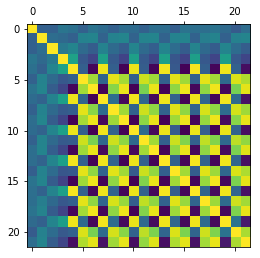

In [31]:
import matplotlib.pyplot as plt

plt.matshow(train.corr())


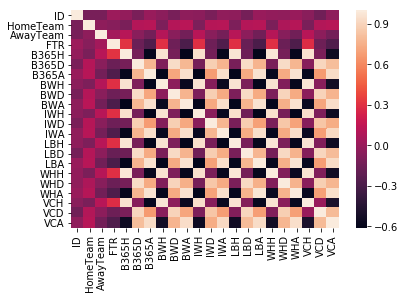

In [47]:
cor_mat = np.corrcoef(train.T)
sns.heatmap(cor_mat,xticklabels=x,yticklabels=x
    )
plt.show()

In [20]:
trainx

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,21,11,2,8.00,4.00,1.45,7.25,4.00,1.48,5.50,...,1.55,6.00,4.00,1.53,7.00,4.00,1.50,7.50,4.00,1.55
1,26,15,1,4.75,3.60,1.75,4.75,3.75,1.70,4.70,...,1.70,4.80,3.60,1.75,4.75,3.60,1.75,4.80,3.60,1.80
2,4,0,1,2.50,3.00,3.00,2.45,3.10,3.00,2.30,...,3.00,2.37,3.20,3.00,2.50,3.00,3.00,2.55,3.20,3.10
3,10,9,1,1.62,3.75,5.50,1.60,3.75,5.75,1.65,...,4.90,1.61,3.75,5.50,1.70,3.75,4.80,1.67,3.90,5.75
4,12,25,1,2.00,3.40,3.75,1.95,3.40,3.90,1.90,...,3.80,1.85,3.50,4.20,2.00,3.40,3.75,2.00,3.40,4.10
5,14,20,2,3.60,3.50,2.00,3.70,3.40,2.00,3.60,...,2.00,3.75,3.40,2.00,3.40,3.60,2.05,3.75,3.60,2.05
6,16,2,1,1.36,4.75,8.50,1.33,5.00,9.00,1.40,...,7.30,1.40,4.50,7.50,1.40,4.50,8.00,1.40,4.80,9.00
7,18,7,2,1.85,3.50,4.20,1.83,3.40,4.50,1.90,...,3.80,1.90,3.40,4.00,1.85,3.40,4.40,1.90,3.50,4.60
8,24,22,1,2.00,3.30,3.80,1.95,3.30,4.00,2.00,...,3.60,1.90,3.40,4.00,2.05,3.25,3.80,2.05,3.40,4.00
9,8,5,1,1.44,4.20,7.50,1.45,4.20,7.25,1.45,...,7.00,1.53,4.00,6.00,1.50,4.20,6.50,1.50,4.50,7.00


In [21]:
trainy

0       2
1       1
2       1
3       1
4       1
5       2
6       1
7       2
8       1
9       1
10      2
11      1
12      1
13      2
14      2
15      2
16      1
17      1
18      2
19      1
20      2
21      1
22      2
23      2
24      1
25      1
26      2
27      2
28      1
29      2
       ..
1489    2
1490    1
1491    2
1492    2
1493    2
1494    2
1495    1
1496    1
1497    1
1498    1
1499    2
1500    1
1501    1
1502    2
1503    1
1504    1
1505    2
1506    2
1507    2
1508    1
1509    2
1510    2
1511    2
1512    2
1513    1
1514    1
1515    2
1516    2
1517    2
1518    1
Name: FTR, Length: 1319, dtype: int64

In [22]:
trainx.dtypes

HomeTeam      int32
AwayTeam      int32
FTR           int64
B365H       float64
B365D       float64
B365A       float64
BWH         float64
BWD         float64
BWA         float64
IWH         float64
IWD         float64
IWA         float64
LBH         float64
LBD         float64
LBA         float64
WHH         float64
WHD         float64
WHA         float64
VCH         float64
VCD         float64
VCA         float64
dtype: object

In [23]:
bgg=GaussianNB()
bgg.fit(trainx,trainy)
bggtrainingscore=bgg.score(trainx,trainy)
bggtest1score=bgg.score(testx,testy)


print("bggtrainingscore=",bggtrainingscore)
print("bggtest1score=",bggtest1score)


bggtrainingscore= 1.0
bggtest1score= 1.0


In [24]:
clf=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', leaf_size=30, p=1, metric='minkowski')
clf.fit(trainx,trainy)
knntrainingscore=clf.score(trainx,trainy)
knntest1score=clf.score(testx,testy)

knn_predict=clf.predict(testx)
print("knntrainingscore=",knntrainingscore)
print("knntest1score=",knntest1score)

knntrainingscore= 0.866565579984837
knntest1score= 0.73


In [25]:
svc=SVC(C=2,degree=5,cache_size=50,max_iter=-1,gamma='auto')
svc.fit(trainx,trainy)
svctrainingscore=svc.score(trainx,trainy)
svctest1score=svc.score(testx,testy)

print("svctrainingscore=",svctrainingscore)
print("svctest1score=",svctest1score)

svctrainingscore= 0.9962092494313874
svctest1score= 0.93


In [26]:
testy

def confusionMatrix(conm,siniflar, baslik = "Confusion Matrix",normalize = True, conMap = plt.cm.Blues):
    if normalize:
        conm = conm.astype('float')/conm.sum(axis=1)[:,np.newaxis]
    plt.imshow(conm, interpolation = 'nearest', cmap=conMap)
    plt.title(baslik)
    plt.colorbar()
    tm = np.arange(len(siniflar))
    plt.xticks(tm,siniflar,rotation=90)
    plt.yticks(tm,siniflar)
    formt = '.2f'
    thresh =conm.max() / 2.
    for i,j in itertools.product(range(conm.shape[0]),range(conm.shape[1])):
        plt.text(j,i,format(conm[i,j],formt),horizontalalignment="center",color="white" if conm[i,j] > thresh else "black")
        
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

[[64 32]
 [22 82]] 

 Test2 Classification Report
              precision    recall  f1-score   support

           1       0.74      0.67      0.70        96
           2       0.72      0.79      0.75       104

   micro avg       0.73      0.73      0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



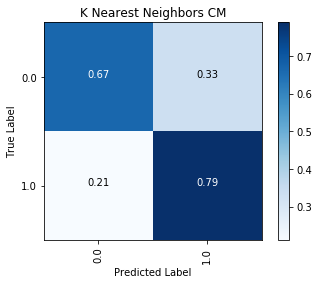

In [27]:
degerler = [1,3,5,10,15,25]
skors = []

#for i in degerler:
 #   svc1=SVC(C=1,degree=0,cache_size=50,max_iter=-1,gamma='auto')
  #  svc1.fit(trainx,trainy)
   # svctrainingscore=svc1.score(trainx,trainy)
    #svctest1score=svc1.score(testx,testy)
    #skors.append([svctrainingscore,svctest1score])
for i in degerler:
    clf1=KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='brute', leaf_size=30, p=1, metric='minkowski')
    clf1.fit(trainx,trainy)
    knntrainingscore1=clf1.score(trainx,trainy)
    knntest1score1=clf1.score(testx,testy)
    skors.append([knntrainingscore1,knntest1score1])
knn_pred =clf.predict(testx)
knn_cm = confusion_matrix(testy,knn_pred)
np.set_printoptions(precision=2)
knn_sinif = ["0.0","1.0"]
knn_baslik = "K Nearest Neighbors CM"
confusionMatrix(knn_cm,siniflar = knn_sinif, baslik = knn_baslik,normalize = True)
print(knn_cm,"\n\n Test2 Classification Report")
print(classification_report(testy,knn_pred))

[[64 32]
 [22 82]] 

 Test2 Classification Report
              precision    recall  f1-score   support

           1       0.86      0.93      0.89        96
           2       0.93      0.87      0.90       104

   micro avg       0.90      0.90      0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



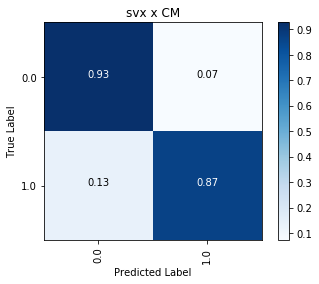

In [28]:
skorss = []
for i in degerler:
    svc=SVC(C=1,degree=5,cache_size=50,max_iter=-1,gamma='auto')
    svc.fit(trainx,trainy)
    svctrainingscore=svc.score(trainx,trainy)
    svctest1score=svc.score(testx,testy)
    skorss.append([svctrainingscore,svctest1score])
svc_pred =svc.predict(testx)
svc_cm = confusion_matrix(testy,svc_pred)
np.set_printoptions(precision=2)
knn_sinif = ["0.0","1.0"]
knn_baslik = "svx x CM"
confusionMatrix(svc_cm,siniflar = knn_sinif, baslik = knn_baslik,normalize = True)
print(knn_cm,"\n\n Test2 Classification Report")
print(classification_report(testy,svc_pred))